# Projeto de Ciência de Dados - AirBnB Rio de Janeiro

## Identificar determinar preço de um Airbnb com base em suas características

Neste projeto, serão analizados os dados referente aos anos de 2018 a 2020 das características e valores dos imóveis registrados no Airbnb da cidade do Rio de Janeiro - RJ - Brasil. <br>
Com base nas informações levantadas, será treinado um modelo de IA capaz de predizer o valor esperado de um imóvel dado suas características.

Serão executadas as etapas de:
1. Compreensão do problema proposto
2. Entendimento da aplicação do problema na empresa / área
3. Extração/Obtenção dos dados
4. Ajustes / Limpeza dos dados
5. Análise exploratória das informações obtidas
6. Treinmaneto do modelo e aplicação dos algoritmos de análise
7. Interpretação dos resultados
8. Deploy do modelo para produção.


## Compreensão do Problema

#### Contexto
<br>
No Airbnb, uma pessoa pode colocar seu imóvel ou parte dele para locações por meio do Aplicativo próprio da empresa. O aluguél é costumeiramente por diárias e é necessário que o dono do imóvel crie um perfil como "host" no site/app da empresa. <br>
<br>
Em cada anúncio, são detalhadas as informações sobre o imóvel e, dependendo destas características, um cliente avaliará o custo x benefício deste imóvel em relação ao valor cobrado pela diária.
<br><br>
Cada host pode personalizar seu anúncio com diversos elementos, desde regras de cancelamento até tarifas para pesoas extras. Cara elemento pode ser relevânte para um cliente avaliar se o custo desta diária está dentro dos parâmetros esperados.

#### Nosso Objetivo
<br>
Para facilitar a uma pessoa física, determinar o correto valor da diária de seu imóvel, seja ele uma casa, apartamento ou somente um quarto, propõe-se o desenvolvimento de um modelo de previsão de preço para diária, baseado nas características do imóvel desejado aplicado sobre um modelo treinado com os dados obtidos dos anos de 2018 a 2020.
<br><br>
Com isso, espera-se dar a oportunidade a pessoas físicas de identificar o preço correto para seu imóvel, ao mesmo tempo que facilite aos clientes identificar oportunidades de locação com preços menores e mais atrativos, ou preços abusivos, onde a qualidade do imóvel não justifica o preço.


#### Créditos e inspiração
<br>
Este projeto se inspirou e utilizou como base, os dados obtidos da base pública disponibilizada pelo contribuidor Allan Bruno em seu <a href="https://www.kaggle.com/allanbruno/airbnb-rio-de-janeiro" taget="blank">Perfil do Keggle</a>
<br>
Utilizando esta base de dados, o autor Allan Bruno desenvolveu sua própria solução, sendo este exercício uma variação dos resultados obtidos pelo trabalho original, encontrado neste <a href="https://www.kaggle.com/allanbruno/helping-regular-people-price-listings-on-airbnb" target="blank">link</a>



## Base de Dados

O download dos dados pode ser realizado <a href="https://www.kaggle.com/code/allanbruno/helping-regular-people-price-listings-on-airbnb/data" target="blank">NESTE LINK </a>

#### Descrição geral da base
<br>
A base de dados disponibilizada é composta por <br>


- Preços e características dos Airbnb obtidos mês a mês
- Os preços obtidos são apresentados em REAIS 
- Os dados são de ABRIL de 2018 até MAIO de 2020. Exceto JUNHO de 2018, qual não consta nos dados obtidos.
    

## Expectativas iniciais

<br>
Uma análise prévia, basado em conhecimento empírico, supõe-se que alguns fatores possam alterar os preços:

- Sazonalidade: Em determinados períodos do ano, os aluguéis tornam-se mais caros (temporadas de férias/verão)
- Locazação: De praxe, um atributo que comumente no mercado imobiliário é usado para alterar os valores, mesmo as características sendo iguais.
- Adicionais/Comodidates: Elementos extras/adicionais podem trazer um grande impacto sobre o valor final

Neste estudo, além de identificar a veracidade destes elementos, procuraremos identificar outros que possam impactar na precificação do imóvel.

## Desenvolvimento do Projeto


#### Importação de bibliotecas e bases de dados

Aqui constam as importações necessárias para a execução do projeto.
Dividiu-se as importações em "Geral" e "Machine Learning".

In [8]:
#Geral
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import timeit

#Machine Learning
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

#### Consolidar bases de dados

Aqui é realizado o processo de consulta a pasta "dataset" e aos arquivos nela contidos. 
Todos os arquivos são lidos e agrupados em um unico DataFrame, mantendo a informação do Mês e Ano em que foram extraídas as informações.

In [69]:
#Dicionário dos meses do ano
meses = {'jan': 1, 'fev': 2,'mar': 3,'abr': 4,'mai': 5,'jun': 6,'jul': 7,'ago': 8,'set': 9,'out': 10,'nov': 11,'dez': 12,}
caminho_base = pathlib.Path('dataset')

base_airbnb = pd.DataFrame()

for arquivo in caminho_base.iterdir():
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]
    
    ano = arquivo.name[-8:]
    ano = int(ano.replace(".csv",""))
    
    df = pd.read_csv(caminho_base / arquivo.name) # <-- para o pathlib, usa-se a "/" para concatenar caminhos
    df['Ano'] = ano
    df['Mes'] = mes
    base_airbnb = base_airbnb.append(df)
    
display(base_airbnb)


C:\Users\ronan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (62,87) have mixed types.Specify dtype option on import or set low_memory=False.

C:\Users\ronan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.

C:\Users\ronan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.



id                            listing_url       scrape_id  \
0         14063     https://www.airbnb.com/rooms/14063  20180414160018   
1         17878     https://www.airbnb.com/rooms/17878  20180414160018   
2         24480     https://www.airbnb.com/rooms/24480  20180414160018   
3         25026     https://www.airbnb.com/rooms/25026  20180414160018   
4         31560     https://www.airbnb.com/rooms/31560  20180414160018   
...         ...                                    ...             ...   
34324  38844730  https://www.airbnb.com/rooms/38844730  20190923212307   
34325  38846408  https://www.airbnb.com/rooms/38846408  20190923212307   
34326  38846703  https://www.airbnb.com/rooms/38846703  20190923212307   
34327  38847050  https://www.airbnb.com/rooms/38847050  20190923212307   
34328  38847655  https://www.airbnb.com/rooms/38847655  20190923212307   

      last_scraped                                          name  \
0       2018-04-14                          Living in a Postcard   
1       2018-04-14             Very Nice 2Br - Copacabana - WiFi   
2       2018-04-14              Nice and cozy near Ipanema Beach   
3       2018-04-14     Beautiful Modern Decorated Studio in Copa   
4       2018-04-14              NICE & COZY 1BDR - IPANEMA BEACH   
...            ...                                           ...   
34324   2019-09-24             TRANSAMERICA BARRA DA TIJUCA R IV   
34325   2019-09-24                      Alugo para o Rock in Rio   
34326   2019-09-24  Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA   
34327   2019-09-24                     Cobertura Cinematografica   
34328   2019-09-24     Quarto em cobertura em frente à praia III   

                                                 summary  \
0      Besides the most iconic's view, our apartment ...   
1      Please note that special rates apply for New Y...   
2      My studio is located in the best  of Ipanema. ...   
3      Our apartment is a little gem, everyone loves ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...   
34325  Confortável apartamento, 2 quartos , sendo 1 s...   
34326  Apartamento quarto e sala COMPLETO para curtas...   
34327                               Cobertura alto nivel   
34328  Quarto em cobertura quadriplex com vista lindí...   

                                                   space  \
0                                                    NaN   
1      - large balcony which looks out on pedestrian ...   
2      The studio is located at Vinicius de Moraes St...   
3      This newly renovated studio (last renovations ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324                                                NaN   
34325  O apartamento estará com mobília completa disp...   
34326  Espaço ideal para até 5 pessoas. Cama de casal...   
34327                                                NaN   
34328                                                NaN   

                                             description experiences_offered  \
0      Besides the most iconic's view, our apartment ...                none   
1      Please note that special rates apply for New Y...                none   
2      My studio is located in the best  of Ipanema. ...                none   
3      Our apartment is a little gem, everyone loves ...                none   
4      This nice and clean 1 bedroom apartment is loc...                none   
...                                                  ...                 ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...                none   
34325  Confortável apartamento, 2 quartos , sendo 1 s...                none   
34326  Apartamento quarto e sala COMPLETO para curtas...                none   
34327                               Cobertura alto nivel         

#### Limpeza de atributos desnecessários

- Devido a quantidade de linhas e colunas dos dados, fica difícil ter uma visão clara e rápida de toda a perspectiva da tabela
- Por ter muitos atributos, nossa análise pode ser prejudicada por informações de pouca ou nenhuma relevância
- Algunas columas são evidentemente desnecessárias:
    1. IDs/Chaves primárias 
    2. Links
    3. Datas referentes a eventos de sistema
    4. Campos de textos livres, tais como 'summary' e 'name'
    5. Atributos majoritarimente nulos (mais de 30%)
    6. Atributos implicitos e redundantes (Por ser uma análise local (Rio de Janeiro), itens como Cidade, Estado, País são redundantes)
    7. Faixas de preço fora do objetivo (Nosso objetivo é uma diária, então semanais e mensais são excluídos)
    

Depois da Análies Qualitativa dos atributos, fica clara a necessidade uma abordagem alternativa para realizar uma primeira avaliação dos dados.

Será então, criado um arquivo XLSX com uma amostra de registros (1000 tuplas) para avaliação do arquivo.

In [72]:
# Os códigos a seguir foram utilizados para realizar uma análise prévia dos dados. 

#base_airbnb.head(1000).to_csv('amostra1000.csv', sep=";", encoding="utf-8", index=False)
    
# Uma fez exportado a amostra para o CSV. Utilizou-se um programa para ler as informações (Excel) e analisar a necessidade 
# real de algumas colunas. Contatou-se que várias colunas não teriam utilidade e foram removidas de forma manual.
# Gerado uma versão atualizada e reduzida da base "amostra1000.csv", ela foi lida e suas alterações aplicadas
# a base "base_airbnb"

# Colunas removidas da análise feita manualmente:
colunas = ['space','id','listing_url','scrape_id','last_scraped','name','summary','description',
           'experiences_offered','neighborhood_overview','notes','transit','access','interaction',
           'house_rules','thumbnail_url','medium_url','picture_url','xl_picture_url','host_id','host_url',
           'host_name','host_since','host_about','host_location','host_response_time','host_response_rate',
           'host_acceptance_rate','host_thumbnail_url','host_picture_url','host_neighbourhood','host_total_listings_count',
           'host_verifications','host_has_profile_pic','host_identity_verified','street','neighbourhood',
           'neighbourhood_cleansed','neighbourhood_group_cleansed','city','state','zipcode','market',
           'smart_location','country_code','country','is_location_exact','square_feet','weekly_price',
           'monthly_price','security_deposit','cleaning_fee','guests_included','minimum_nights','maximum_nights',
           'calendar_updated','has_availability','availability_30','availability_60','availability_90','availability_365',
           'calendar_last_scraped','first_review','last_review','review_scores_rating','review_scores_accuracy',
           'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
           'review_scores_value','requires_license','license','jurisdiction_names','is_business_travel_ready',
           'cancellation_policy','require_guest_profile_picture','require_guest_phone_verification'
           ,'calculated_host_listings_count','reviews_per_month','minimum_minimum_nights','maximum_minimum_nights',
           'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
           'number_of_reviews_ltm','calculated_host_listings_count_entire_homes',
           'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']


for col in colunas:
    base_airbnb =  base_airbnb.drop(col, axis=1)


base_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902210 entries, 0 to 34328
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   space                543496 non-null  object 
 1   host_is_superhost    901750 non-null  object 
 2   host_listings_count  901750 non-null  float64
 3   latitude             902210 non-null  float64
 4   longitude            902210 non-null  float64
 5   property_type        902210 non-null  object 
 6   room_type            902210 non-null  object 
 7   accommodates         902210 non-null  int64  
 8   bathrooms            900486 non-null  float64
 9   bedrooms             901360 non-null  float64
 10  beds                 899708 non-null  float64
 11  bed_type             902210 non-null  object 
 12  amenities            902210 non-null  object 
 13  price                902210 non-null  object 
 14  extra_people         902210 non-null  object 
 15  number_of_reviews 

#### Tratamento de valores NULL / NaN / Omissos 

Visualizando os dados, notou-se que algumas colunas (atributos) tinham uma grande porcentagem de dados faltantes. Essas colunas foram removidas.

Para as linhas, as que ainda tem dados NaN/Null/etc., mesmo após a remoção das colunas, serão apagadas.



Obs.: O atributo "zip code" por eventualmente indicar uma informação que poderá ser substituída pela latitude e longitude, será removido também.

- Removendo Colunas/Atributos

In [74]:
for col in base_airbnb:
    if base_airbnb[col].isnull().sum() >300000:
        base_airbnb = base_airbnb.drop(col, axis=1)

#Demonstração dos resultados
display(base_airbnb.isnull().sum())
print(base_airbnb.shape)


host_is_superhost       460
host_listings_count     460
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms              1724
bedrooms                850
beds                   2502
bed_type                  0
amenities                 0
price                     0
extra_people              0
number_of_reviews         0
instant_bookable          0
Ano                       0
Mes                       0
dtype: int64

(902210, 18)


- Removendo linhas

In [75]:
base_airbnb = base_airbnb.dropna()

print(base_airbnb.shape)
print(base_airbnb.isnull().sum())

(897709, 18)
host_is_superhost      0
host_listings_count    0
latitude               0
longitude              0
property_type          0
room_type              0
accommodates           0
bathrooms              0
bedrooms               0
beds                   0
bed_type               0
amenities              0
price                  0
extra_people           0
number_of_reviews      0
instant_bookable       0
Ano                    0
Mes                    0
dtype: int64


#### Conhecer e identificar os tipos de dados das colunas

Para melhor aplicação dos algoritmos de Análise de Dados, é necessário que alguns dados tenham seu tipo corrigido para que se alinhem a sua real função.<br>

Atributos numéricos que sejam identificados como numéricos, devem ser ajustados de forma apropriada.

- Problemas detectados:
    1. 'price' como texto ao invés de float
    2. 'extra_people' como texto ao invés de float

In [76]:
print(base_airbnb.iloc[0]) # imprime a primeira linha pra ajuda na analise

#-------------------------------------------------------------------------------#
base_airbnb['price'] = base_airbnb['price'].astype(str)

base_airbnb['price'] = base_airbnb['price'].str.replace('$','')
base_airbnb['price'] = base_airbnb['price'].str.replace(',','')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)

base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(str)

base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$','')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',','')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)


print(base_airbnb.dtypes) # Cria uma lista com os tipos de dados



host_is_superhost                                                      f
host_listings_count                                                  1.0
latitude                                                      -22.946854
longitude                                                     -43.182737
property_type                                                  Apartment
room_type                                                Entire home/apt
accommodates                                                           4
bathrooms                                                            1.0
bedrooms                                                             0.0
beds                                                                 2.0
bed_type                                                        Real Bed
amenities              {TV,Internet,"Air conditioning",Kitchen,Doorma...
price                                                            $133.00
extra_people                                       

C:\Users\ronan\AppData\Local\Temp/ipykernel_16320/2076235656.py:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\ronan\AppData\Local\Temp/ipykernel_16320/2076235656.py:12: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



host_is_superhost       object
host_listings_count    float64
latitude               float64
longitude              float64
property_type           object
room_type               object
accommodates             int64
bathrooms              float64
bedrooms               float64
beds                   float64
bed_type                object
amenities               object
price                  float32
extra_people           float32
number_of_reviews        int64
instant_bookable        object
Ano                      int64
Mes                      int64
dtype: object


## Análise Exploratória e remoção de  outliers

Na Análise Exploratória dos dados, observa-se cada um dos features (atributos) para avaliá-los quanto a sua relevância para a análise. Verifica-se os seguintes elementos:

1. Correlação entre as features
2. Excluir Outliers obedecendo a uma regra determinada para cada projeto. Neste caso, considerando Amplitude = Q3-Q1, usaremos:
    - Valores abaixo de: Q1 - 1.5 * Amplitude
    - Valores acima de   Q3 + 1,5 * Amplitude. 
3. Verificação da correlação. Mesmo atributos que apresentem correlação, podem não contribuir para nosso objetivo.

Primeiramente vamos identificar os **outliers** referente ao preço (price) e ao valor de acompanhantes (extra_people)
Depois, vamos avaliar o atributos discretos (que são usados para descrever quantidades e itens. Valores inteiros, normalmente)
Por fim, serão analizadas as colunas textuais, avaliando a relevância das informações nelas contidas.



### Analise da Correlação

<AxesSubplot:>

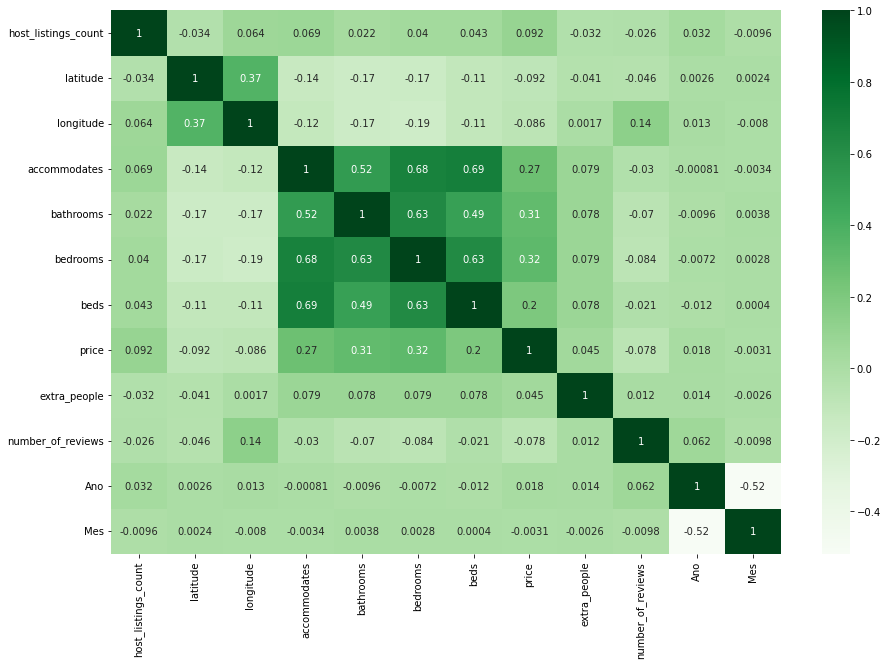

In [77]:
# Quanto mais próximo de 1, maior é a correlação deles. 
# Valores mais proximos de -1 tem correlação inversa
# Utilizado a lib "SeaBorn" para criar um heatmap dos valores de correlação
plt.figure(figsize=(15,10))
sns.heatmap(base_airbnb.corr(), annot=True, cmap='Greens') 

### Sobre a correlação

A correlação nos auxilia a identificar as features (atributos) que são relacionados ao nosso atributo objetivo, o preço (_price_). Também permitirá identificar atributos com informações repetidas, caso eles tenham uma correlação muito grande (correlação de 1 ou aproximados). As repetições devem ser removidas para evitar o overfitting.

Um exemplo observado é a correção de quartos/camas (bedrooms e beds) com número de pessoas que o imóvel acomoda (accommodates). Se essas correlação fosse mais próxima de 1 (0.90 + ou - ) poderiamos talvez, eliminar uma das colunas pois o impacto dela no nosso modelo preditivo seria o mesmo da outra. Então não faria sentido avaliarmos nosso modelo com ambos valores correlatos.

### Criando funções para detecção de outliers.

Para auxiliar na detecção de outliers, será desenvolvido algumas funções para calcular os limites superiores, inferiores, amplitude, etc.

In [78]:
# define os limites de uma coluna do DF
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3-q1
    limite_inferior = q1-1.5*amplitude
    limite_superior = q3+1.5*amplitude
    return (limite_inferior, limite_superior)

### Criando função de definição e criação de gráfico para análise dos limites


In [79]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    

def histograma(coluna):
    plt.figure(figsize=(15,5))
    sns.distplot(coluna, hist=True)
    
def grafico_barra(coluna):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limites(coluna))
    

**Utilizando as funções desenvolvidas para julgar a base de dados**

C:\Users\ronan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



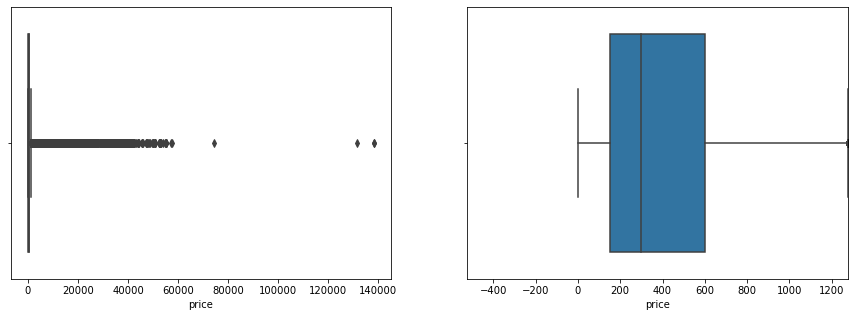

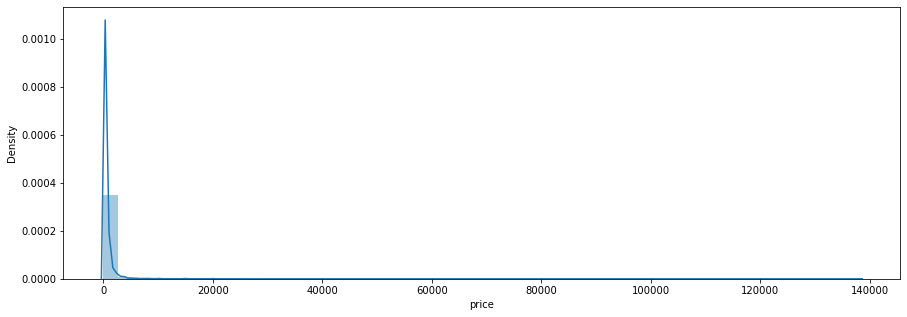

In [80]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

### Exclusão de Outliers: Motivação e justificativa

Ao observar a distribuição dos gráficos boxplot e histograma, nota-se que existem preços (_price_) que superam os limiares máximos e mínimos de preços definidos com base em nossas análise anteriores.

Como o objetivo desta análisé é treinar um algoritmo que auxilie na definição de valores de imóveis para pessoas físicas comuns, então não pretendemos considerar valores de imóveis que estão fora da realidade brasileira média.

É importante destacar que, antes de qualquer exclusão, será avaliado a quantidade de registros que estão fora dos limites estabelecidos, caso a quantidade tenha uma alta expressividade, será necessário uma visão mais cuidadosa. Todavia, caso somente uma pequena porcentagem de registros estejam além dos limites, então a exclusão destes poderá beneficiar nossa análise.

### Definir função de excluir Outliers

In [81]:
# Determinar função de exclusão de outliers
# Retornará um dataframe sem outliers e o num de linhas excluidas

def excluir_outliers(df, nome_coluna):
    qtd_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])    
    df = df.loc[(df[nome_coluna]>=lim_inf) & (df[nome_coluna]<=lim_sup) , :]  # --> Pra filtrar usamos:  df.loc[linhas, colunas] 
    linhas_removidas = qtd_linhas-df.shape[0]
    return (df, linhas_removidas)

### Removendo os outliers

A seguir serão aplicadas as funções de análise e exclusão de outliers desenvolvidas anteriormente. Serão aplicados em todos os atributos que possuem valores numérios.


Todas as análises serão baseadas nos gráficos, histogramas, e tabelas que foram desenvolvidas para visualizar informação;
Se julgado necessário, será aplicado a função de exclusão de outliers.


#### price

In [82]:
base_airbnb, qtd_linhas = excluir_outliers(base_airbnb, 'price')

In [83]:
print('Linhas removidas: {}'.format(qtd_linhas))
base_airbnb.info()

Linhas removidas: 87282
<class 'pandas.core.frame.DataFrame'>
Int64Index: 810427 entries, 0 to 34328
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   host_is_superhost    810427 non-null  object 
 1   host_listings_count  810427 non-null  float64
 2   latitude             810427 non-null  float64
 3   longitude            810427 non-null  float64
 4   property_type        810427 non-null  object 
 5   room_type            810427 non-null  object 
 6   accommodates         810427 non-null  int64  
 7   bathrooms            810427 non-null  float64
 8   bedrooms             810427 non-null  float64
 9   beds                 810427 non-null  float64
 10  bed_type             810427 non-null  object 
 11  amenities            810427 non-null  object 
 12  price                810427 non-null  float32
 13  extra_people         810427 non-null  float32
 14  number_of_reviews    810427 non-null  int64  

Após a exclusão dos outliers, reduzimos nossa base em aproximadamente 10% de seu tamanho original. Ainda que seja um valor considerável (mais de 87 mil itens), dado nossa população de mais de 800 mil registros e o objetivo final que é construir uma solução que permita prever os preços dos imóveis AirBnB na cidade do Rio de Janeiro, excluindo os itens de super luxo, então tornou a decisão de excluir estes registros como aceitável para o correto treinamento do algoritmo.

C:\Users\ronan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



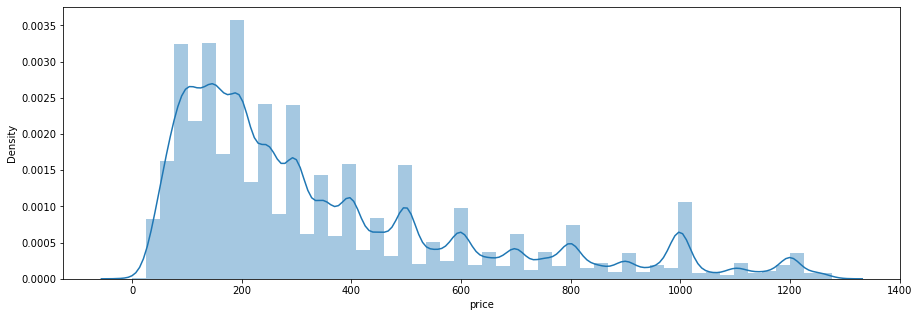

In [84]:
histograma(base_airbnb['price'])

#### extra_people

C:\Users\ronan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



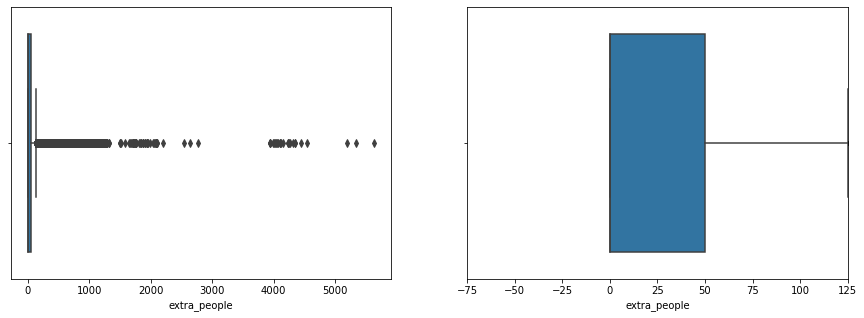

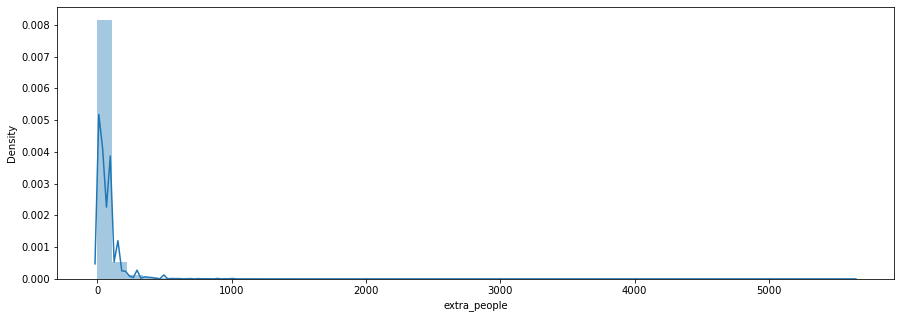

In [85]:
# Primeiro passo: Avaliar a distribuição das informações
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

In [86]:
base_airbnb_previa, qtd_linhas = excluir_outliers(base_airbnb, 'extra_people')
print('Linhas removidas: {}'.format(qtd_linhas))

base_airbnb = base_airbnb_previa

Linhas removidas: 59194


Com a remoção dos outliers do campo "extra_people" foram excluídos 59.194 registros da nossa análise. 

É importante frizar que, diferente do price, o campo "extra_people" pode não ser relevante para nossa análise. Se ao final, o resultado de nosso modelo mostrar-se ineficiente, poderemos realizar outras vertentes de treino, removendo campos com pouca relevância, como o caso do "extra_people"

#### host_listings_count

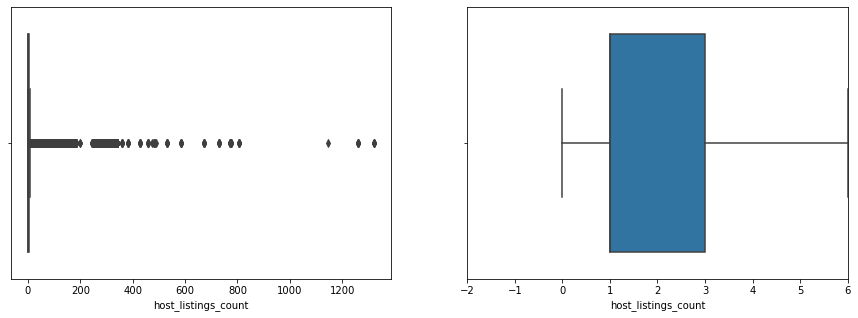

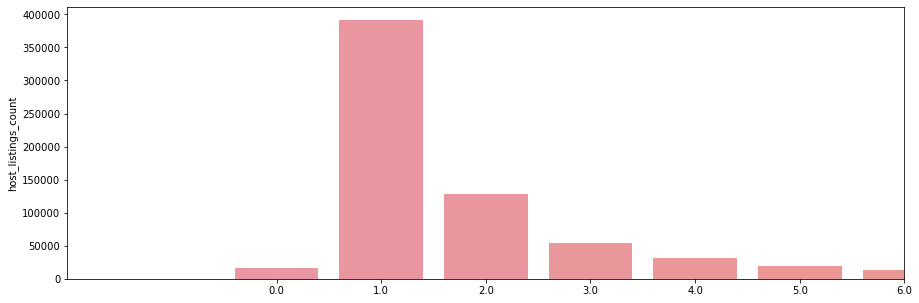

In [87]:
diagrama_caixa(base_airbnb['host_listings_count'])
grafico_barra(base_airbnb['host_listings_count'])

Removemos os clientes com mais de 6 imóveis pois esse perfil de cliente não fará parte do escopo do nosso projto inicialmente. Pessoas com mais de 6 propriedades podem representar 

In [88]:
base_airbnb_previa, qtd_linhas = excluir_outliers(base_airbnb, 'host_listings_count')
print('Linhas removidas: {}'.format(qtd_linhas))
base_airbnb = base_airbnb_previa

Linhas removidas: 97723


#### accommodates

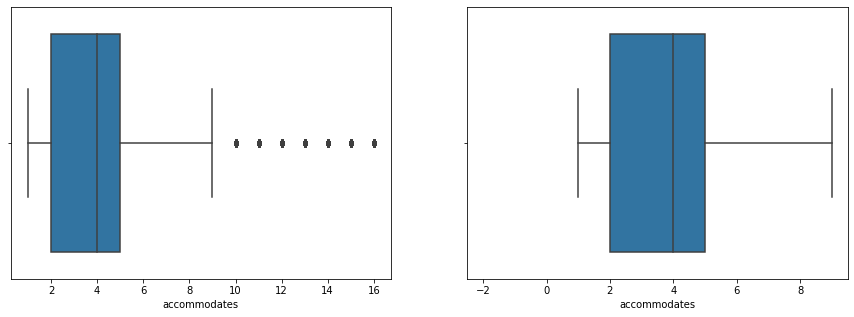

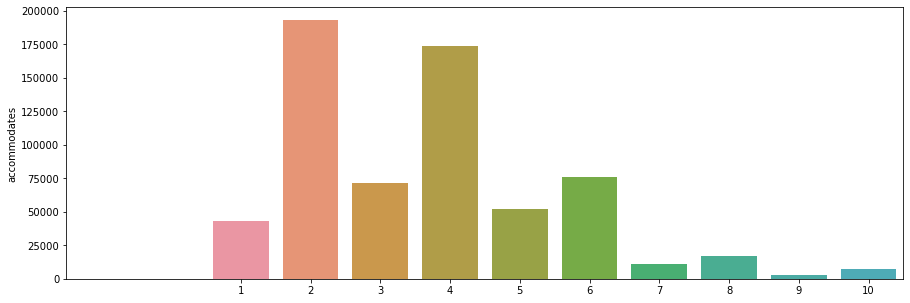

In [89]:
diagrama_caixa(base_airbnb['accommodates'])
grafico_barra(base_airbnb['accommodates'])

In [90]:
base_airbnb_previa, qtd_linhas = excluir_outliers(base_airbnb, 'accommodates')
print('Linhas removidas: {}'.format(qtd_linhas))

base_airbnb = base_airbnb_previa

Linhas removidas: 13146


#### bathrooms

C:\Users\ronan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



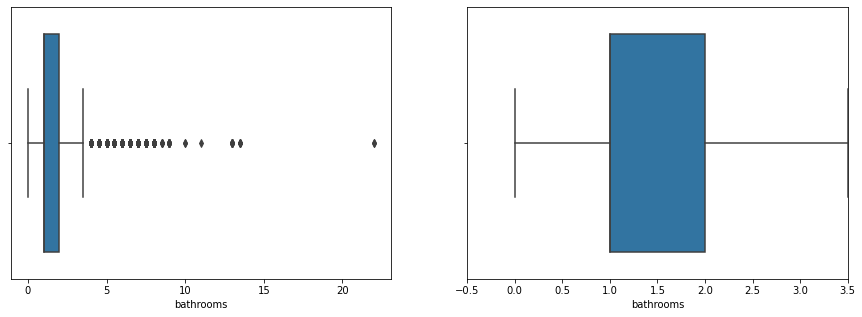

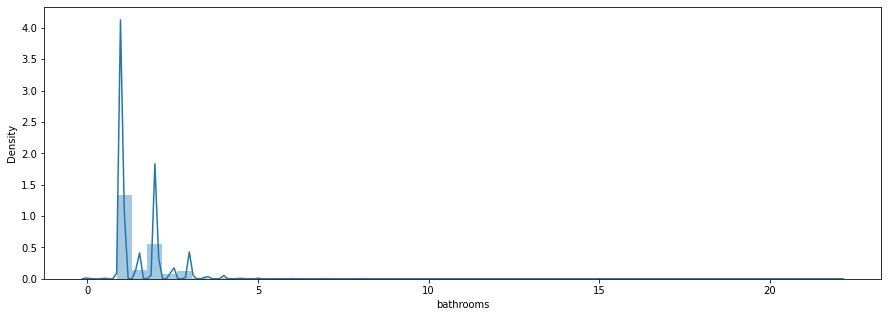

In [91]:
diagrama_caixa(base_airbnb['bathrooms'])
histograma(base_airbnb['bathrooms'])

In [92]:
base_airbnb_previa, qtd_linhas = excluir_outliers(base_airbnb, 'bathrooms')
print('Linhas removidas: {}'.format(qtd_linhas))

base_airbnb = base_airbnb_previa

Linhas removidas: 6894


#### bedrooms

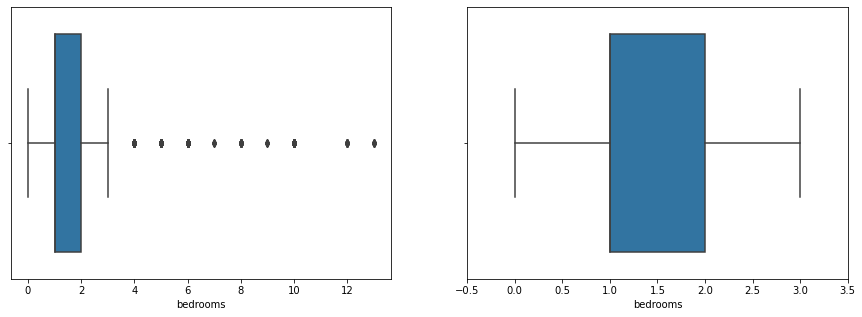

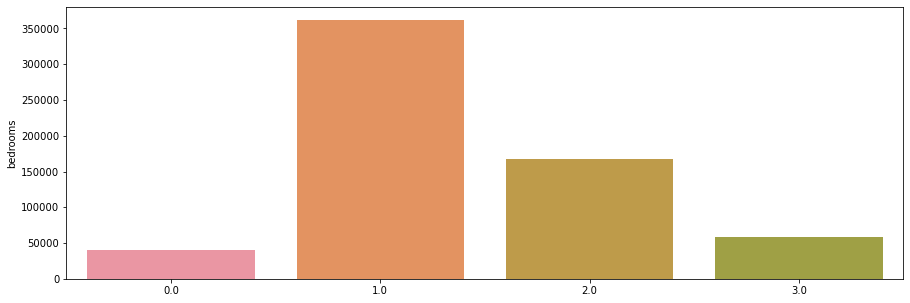

In [93]:
diagrama_caixa(base_airbnb['bedrooms'])
grafico_barra(base_airbnb['bedrooms'])

In [94]:
base_airbnb_previa, qtd_linhas = excluir_outliers(base_airbnb, 'bedrooms')
print('Linhas removidas: {}'.format(qtd_linhas))

base_airbnb = base_airbnb_previa

Linhas removidas: 5482


#### beds

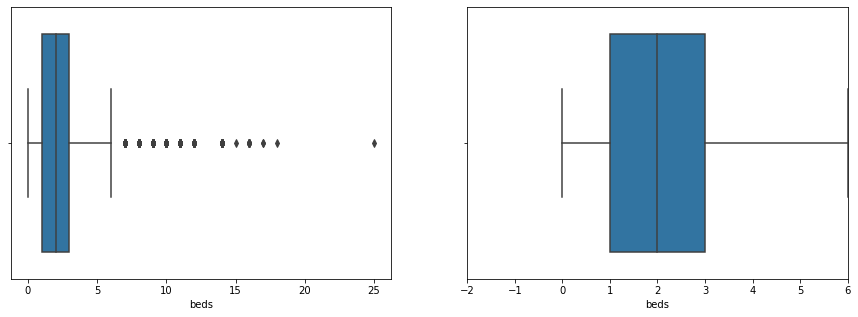

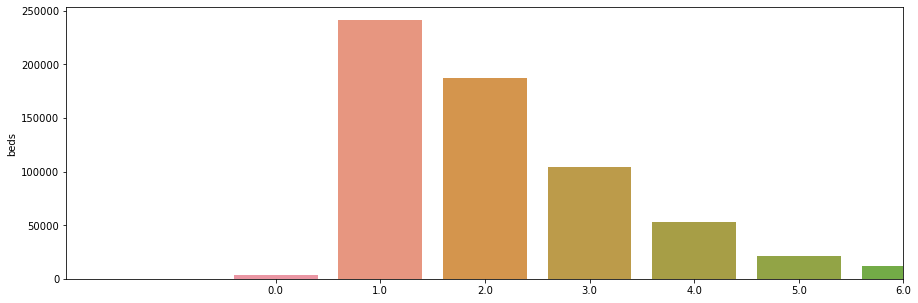

In [95]:
diagrama_caixa(base_airbnb['beds'])
grafico_barra(base_airbnb['beds'])

In [96]:
base_airbnb_previa, qtd_linhas = excluir_outliers(base_airbnb, 'beds')
print('Linhas removidas: {}'.format(qtd_linhas))

base_airbnb = base_airbnb_previa

Linhas removidas: 5622


#### number_of_reviews

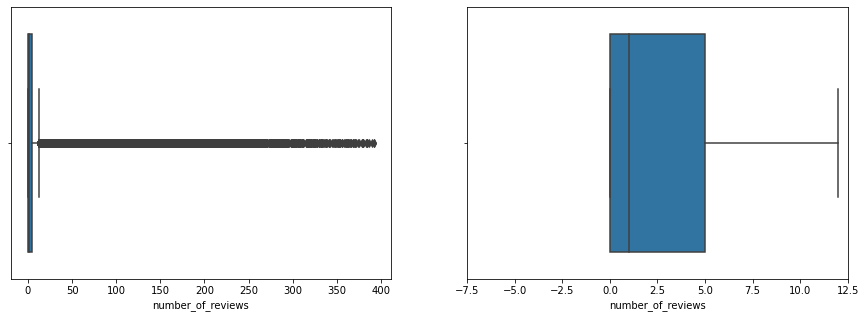

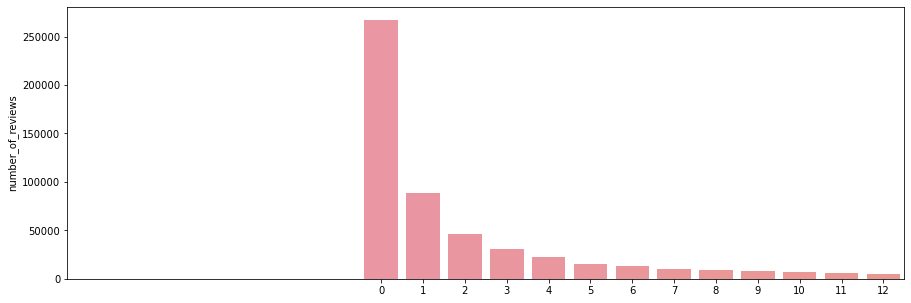

In [100]:
diagrama_caixa(base_airbnb['number_of_reviews'])
grafico_barra(base_airbnb['number_of_reviews'])

Quanto ao atributo number_of_reviews, considerando que:

1. Nosso objetivo é auxiliar a precificar um novo imóvel de pessoa física comum.
2. Novos imóveis não possuem reviews
3. Remover os imóveis com mais reviews seria excluir da base, os melhores hosts

Dada essas informações, fica evidente que a remoção destes outliers não gerará um bom resultado. 
Como alternativa, removeremos a coluna toda, pois como um novo imóvel não possui reviews, provavelmente não impactará na definição de preço

In [101]:
base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)
base_airbnb.shape


(622366, 17)

### Tratamento das features textuais / categóricas

Alguns dos atributos avaliados recebem valores textuais para representar sua informação. Itens como "bed_types" ou "amenities" apresentam informações textuais que dificultam a utilização de certos algoritmos de Machine Learning. 

Deste modo, serão implementados alguns tratamentos de dados para tornar essas informações mais compatíveis com os algoritmos que serão treinados. 

#### Definindo funções úteis


In [102]:
#definir uma função para avaliar a distribuição das categorias textuais:
def avaliar_categorias(coluna):
    print(base_airbnb[coluna].value_counts())
    plt.figure(figsize=(15,5))
    grafico = sns.countplot(coluna, data=base_airbnb)
    grafico.tick_params(axis='x', rotation=90)
    
#Função que faz a mudança de valores abaixo de um limiar para "OUTROS"
def ajuste_categorias(coluna, limiar):
    base_count = base_airbnb[coluna].value_counts()
    colunas_agrupar = []
    base_count.index

    for tipo in base_count.index:
        if base_count[tipo]<limiar:
            colunas_agrupar.append(tipo)

    print(colunas_agrupar)
    print('-'*100)  

    for tipo in colunas_agrupar:
        base_airbnb.loc[base_airbnb[coluna]== tipo, coluna] = 'Outros'

    print(base_airbnb[coluna].value_counts())


#### property_type

Apartment                 492790
House                      54273
Condominium                27679
Serviced apartment         13151
Loft                       12787
Guest suite                 3748
Bed and breakfast           3522
Hostel                      2839
Guesthouse                  2237
Other                       2070
Villa                       1384
Townhouse                   1032
Aparthotel                   720
Earth house                  545
Tiny house                   489
Chalet                       481
Boutique hotel               449
Hotel                        376
Casa particular (Cuba)       328
Cottage                      247
Bungalow                     213
Dorm                         191
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Boat                          65
Island                        54
Hut                           40
Campsite                      34
Resort    

C:\Users\ronan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



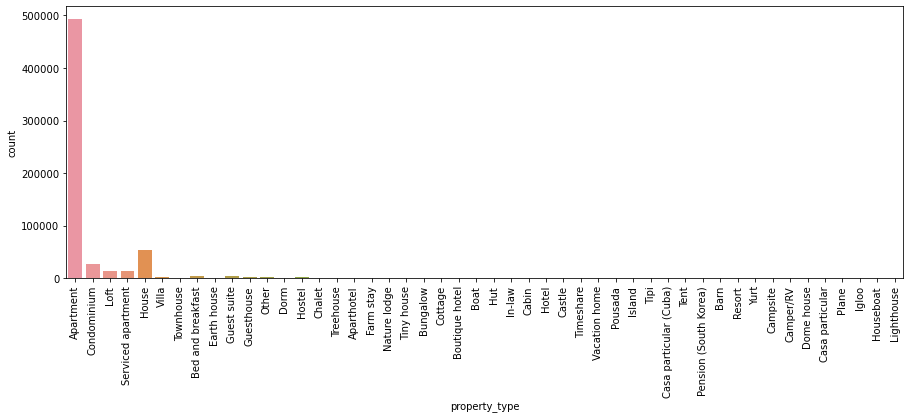

In [103]:
avaliar_categorias('property_type')

In [104]:
ajuste_categorias('property_type', 2000)

['Villa', 'Townhouse', 'Aparthotel', 'Earth house', 'Tiny house', 'Chalet', 'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Cottage', 'Bungalow', 'Dorm', 'Cabin', 'Nature lodge', 'Castle', 'Treehouse', 'Boat', 'Island', 'Hut', 'Campsite', 'Resort', 'Tent', 'Camper/RV', 'Yurt', 'Tipi', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Dome house', 'Igloo', 'In-law', 'Vacation home', 'Houseboat', 'Timeshare', 'Casa particular', 'Pousada', 'Plane', 'Lighthouse']
----------------------------------------------------------------------------------------------------
Apartment             492790
House                  54273
Condominium            27679
Serviced apartment     13151
Loft                   12787
Outros                  7270
Guest suite             3748
Bed and breakfast       3522
Hostel                  2839
Guesthouse              2237
Other                   2070
Name: property_type, dtype: int64


#### room_type

Entire home/apt    404654
Private room       204175
Shared room         12551
Hotel room            986
Name: room_type, dtype: int64


C:\Users\ronan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



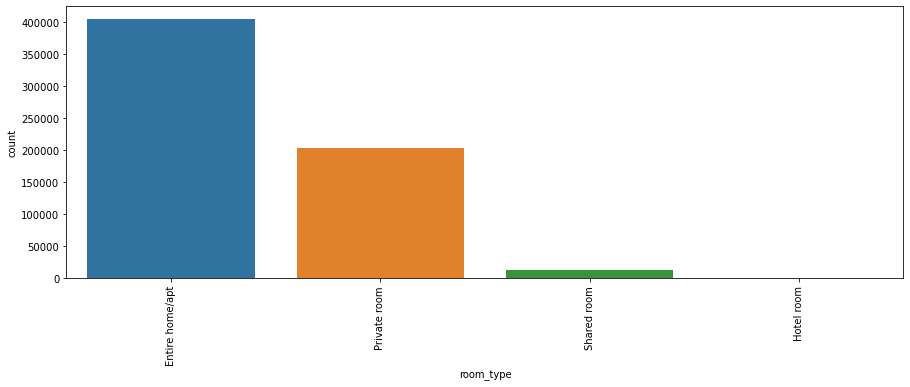

In [105]:
avaliar_categorias('room_type')

#### bed_type

Real Bed         610238
Pull-out Sofa      8475
Futon              1727
Airbed             1349
Couch               577
Name: bed_type, dtype: int64


C:\Users\ronan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



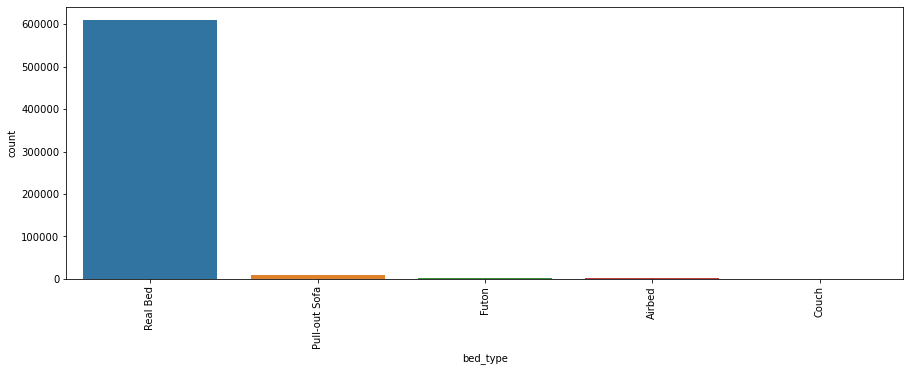

In [106]:
avaliar_categorias('bed_type')

In [107]:
ajuste_categorias('bed_type', 10000)

['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
----------------------------------------------------------------------------------------------------
Real Bed    610238
Outros       12128
Name: bed_type, dtype: int64


#### amenities

In [109]:

print(base_airbnb['amenities'].iloc[1].split(','))
print(len(base_airbnb['amenities'].iloc[1].split(',')))

base_airbnb['numero_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', '"Paid parking off premises"', '"Smoking allowed"', 'Doorman', 'Elevator', '"Hot tub"', '"Family/kid friendly"', '"Suitable for events"', 'Essentials', '"24-hour check-in"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"', '"Self check-in"', '"Front desk/doorperson"', '"Private entrance"', '"Hot water"', '"Bed linens"', '"Luggage dropoff allowed"}']
25


In [110]:
base_airbnb['numero_amenities']

0        11
1        25
3        14
4        16
5        30
         ..
34323    15
34324    18
34325    12
34327    25
34328    17
Name: numero_amenities, Length: 622366, dtype: int64

In [123]:
#Removendo a coluna amenities
base_airbnb = base_airbnb.drop('amenities', axis=1)
base_airbnb.shape

(597527, 17)

#### Removendo outiliers da coluna numero_amenities

uma vez que criamos uma coluna numérica, devemos verificar se não foram criados outiliers que prejudiquem a análise.

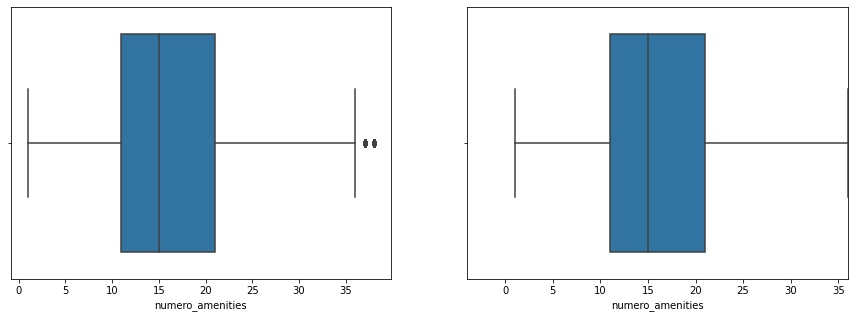

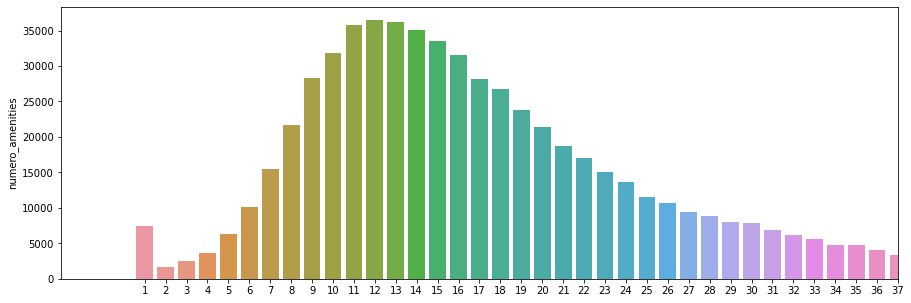

In [124]:
diagrama_caixa(base_airbnb['numero_amenities'])
grafico_barra(base_airbnb['numero_amenities'])

In [125]:
base_airbnb_previa, qtd_linhas = excluir_outliers(base_airbnb, 'numero_amenities')
print('Linhas removidas: {}'.format(qtd_linhas))

base_airbnb = base_airbnb_previa

Linhas removidas: 6746


### Tratamento dos dados de mapas (latitude e longitude)

Ao lidar com um mapa, por vezes temos uma situação onde os dados tornam-se muito agrupados. Este agrupamento causa dificuldade na visualização de informações menos densas. Para resolver estas questões, recomenda-se criar uma amostra da população.
A amostra de itens aleatorios tende a nos fornecer uma visualização semelhante, porém com um custo computacional menor e maior facilidade na visualização dos dados, mesmo aqueles menos densos.


In [126]:
#Amostra de 50 mil registros
amostra = base_airbnb.sample(n=50000)


#Centraliza ro mapa na maior densidade de elementos
centro_mapa = {'lat': amostra.latitude.mean(), 'lon': amostra.longitude.mean()}
grafico = px.density_mapbox(amostra, lat='latitude', lon='longitude', z='price', radius=2.5, 
                            center=centro_mapa, zoom=10,
                            mapbox_style='stamen-terrain',
                            opacity = 1)

grafico.show()

# Encoding

Vamos ajustar atributos categóricos para facilitar o aprendizado do algoritmo.

- As Features de valores "true" ou "false" terão seu valor alterado para "1" ou "0"
- Features de categorias (cujo os valores são textuais) será usado a estratégia de variáveis dummies

*Sobre variáveis Dummies*

São atributos/colunas criadas com base nas categorias de outro atributo. Cada item textual é transformado em uma coluna do dataframe e sempre que a linha de dados nova contiver o nome do atributo/coluna, essa nova coluna ganha valor 1. Caso contrário ela terá valor 0.

Semelhante a seguinte situação, onde 

-- a1 a2 a3     
a3  0 | 0 | 1<br>
a1  1 | 0 | 0<br>
a2  0 | 1 | 0<br>


In [127]:
#Alterando os valores booleanos
colunas_boolean = ['host_is_superhost','instant_bookable' ]

base_airbnb_cod = base_airbnb.copy()

for coluna in colunas_boolean:
    base_airbnb_cod.loc[base_airbnb_cod[coluna]=='t' , coluna]= 1
    base_airbnb_cod.loc[base_airbnb_cod[coluna]=='f' , coluna]= 0

In [128]:
# Alterando valores categóricos
colunas_categorias = ['property_type','room_type','bed_type']

# Usando o método do Pandas, torna-se fácil a criação das variáveis dummies
base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns=colunas_categorias)

print(base_airbnb_cod.iloc[1])

host_is_superhost                           1
host_listings_count                       2.0
latitude                           -22.965919
longitude                          -43.178962
accommodates                                5
bathrooms                                 1.0
bedrooms                                  2.0
beds                                      2.0
price                                   270.0
extra_people                             51.0
instant_bookable                            1
Ano                                      2018
Mes                                         4
numero_amenities                           25
property_type_Apartment                     0
property_type_Bed and breakfast             0
property_type_Condominium                   1
property_type_Guest suite                   0
property_type_Guesthouse                    0
property_type_Hostel                        0
property_type_House                         0
property_type_Loft                

# MACHINE LEARNING

Nesta sessão encontra-se a descrição do processo de compreensão sobre Machine Learning bem como as etapas que foram realizadas para melhor entendimento e criação do modelo.

Por se tratar de um projeto de estudos, alguns elementos podem estar mais longos do que o normal, porém essas decisões foram tomadas em prol da didática do projeto.

### 7 Passos para desenvolver o Machine Learning

1. Definir se é CLASSIFICAÇÃO (Dividir em categorias) ou REGRESSÃO (Encontrar um valor)
2. Escolher as regras para Avaliar o Modelo
3. Escolher quais Modelos serão usados/testados
4. Treinar e testar os modelos escolhidos
5. Comparar os resultados e escolher o modelo vencedor
6. Analisar e entender o melhor modelo mais a fundo
7. Fazer ajustes no melhor modelo (Caso ele se prove realmente bom)


Depois disso podemos partir para o Deploy do modelo

### Passo 1 - Definindo: Classificação ou Regressão?

Como precisamos identificar um valor numérico (preço do aluguél) utiliza-se algoritmos de regressão, onde através da aplicação de uma equação desenvolvida pelo algoritmo, ele é capaz de supor um valor de Y (preço) dado nossas entradas X (valores da tabela)

### Passo 2 - Técnicas de avaliação dos modelos

R² (R Quadrado)
- De 0 a 1 --> Quanto maior melhor
- Mede 'o quanto' dos valores o modelo consegue explicar

<br>

RSME (Erro Quadrático Médio)
- Usa qualquer valor
- Quanto menor, melhor
- Mede 'o quanto o modelo erra'

### Passo 3 - Quais modelos usaremos

Sendo nosso problema, um problema de regressão, utilizaremos os modelos de regressão:
- Linear Regression
- Random Florest Regressor
- Extra Trees

**Regressão Linear:**
Traça uma reta que melhor minimize os erros

**Random Forest Regressor:**
- Usa a base de dados para criar arvores de decisão.
- Diferentes amostras da base geram diferentes arvores
- calcula-se a média dessas arvores para selecionar a melhor composição
- Inicia a arvore usando a "melhor pergunta", ou seja, uma pergunta que divida bem a base de dados

**Extra Trees:**
- Semelhante ao RandomTrees
- Escolhe uma pergunta aleatória ao invés da melhor


### Passo 4 - Treinar e Testar os modelos

Primeiramente separamos os dados da nossa base em
- Treino (80% por exemplo)
- Teste (20% por exemplo)

**Treino**: é usado para que o modelo aprenda sobre os valores/Características (x) e determine a função que determinará nosso Y (quem desejamos calcular)

**Teste**: São dados para validar se o modelo treinou corretamente.

Ao avaliar os resultados do Teste, podemos verificar se o modelo é aceitável e se não aconteceu Overfitting


##### Overfitting
Ocorre quando o algoritmo se torna muito específico aos dados de treino.<br>
Acaba não sendo capaz de julgar corretamente em novos dados.


### Passo 5 - Comparando resultado do teste e escolhendo vencedor

Para chegar a essas conclusões, utilizaremos um algoritmo principal de teste apoiado por outro para confirmar.

- Usaremos o R² como principal apoiado pelo RSME
- Usaremos o RSME como critério de desempate quando o R² for muito próximo.


Outros critérios de avaliação:
- Tempo de execussão: modelo com precisão mas com tempo extenso, pode não ser a melhor opção.
- Modelos mais simples (com poucas informações necessárias) tendem a ser melhores.

### Passo 6 - Analisando o Melhor Modelo mais a fundo

Após identificar o modelo que entrega a melhor "previsão" de Y, vamos entender quais informações ele usa e como podemos melhorá-lo.

Se uma coluna não é utilizada ou usada pouco, podemos removê-la e reavaliar o modeli.


Devemos avaliar/melhorar o modelo quanto:
- Métricas escolhidas (R²e RSME)
- Velocidade do MOdelo
- Simplicidade do modelo


### Passo 7 - Fazer ajuste no Modelo

Objetivo:

- Encontrar uma possível melhoria ao modelo (removendo um atributo por  exemplo)
- Verificar se chegou melhor ou próximo do R² original. Sempre priorizar por bases menores e com o mesmo resultado de desempenho

## Construindo modelo de ML (Código)

- Metricas de avaliação

In [129]:
#função que avalia nosso modelo
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    rsme = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo: {nome_modelo}\nR²: {r2:.2%}\nRSME: {rsme:.2f}'.format()

- Escolha dos modelos a serem testados
    1. RandomForest
    2. LinearRegression
    3. ExtraTree

In [130]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et= ExtraTreesRegressor()

modelos = {'RandomForest':modelo_rf,
          'LinearRegression': modelo_lr,
          'ExtraTrees':modelo_et}


- Separar dados de Treino e Teste. Treinamento do Modelo

In [131]:
y = base_airbnb_cod['price']
x = base_airbnb_cod.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

In [132]:
for nome_modelo, modelo in modelos.items():
    inicio = timeit.default_timer()

    #treinar
    modelo.fit(x_train, y_train)
    
    #testar
    previsao = modelo.predict(x_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))
    fim = timeit.default_timer()
    print ('duracao: %f' % (fim - inicio))

Modelo: RandomForest
R²: 97.55%
RSME: 43.30
duracao: 270.797674
Modelo: LinearRegression
R²: 33.23%
RSME: 226.25
duracao: 0.909154
Modelo: ExtraTrees
R²: 97.72%
RSME: 41.79
duracao: 238.598659


**Resultado da avaliação dos modelos**

_Essa avaliação foi baseada em uma execução do projeto. Seus valores podem alterar em novas execuções. Use essas informações como exemplo._

Modelo: RandomForest<br>
R²: 0.972525583512986<br>
RSME: 43.95399985538098<br><br>
Modelo: LinearRegression<br>
R²: 0.3270168813289167<br>
RSME: 217.53855974042654<br><br>
Modelo: ExtraTrees<br>
R²: 0.9749317990942383<br>
RSME: 41.98515366150092<br>



- Melhor algoritmo: ExtraTreeRegressor

Considerando que:

    1. R² do algoritmo ExtraTreeRegressor melhor que os demais modelos
    2. RSME do ExtraTreeRegressor apresentou o menor erro médio
    3. Tempo: Não houve diferença significativa entre os melhores modelos ExtraTreeRegressor e RandomForestRegressor
    4. LinearRegression não obteve êxito nem no R² nem RSME para que pudesse ser considerado.
    
<br>
Portanto, ao final da análise, notou-se que o algoritmo ExtraTreeRegressor  teve melhor performance e resultado no geral foi o Extra Trees. Ainda que se aproxime muito do algoritmo Random Forest.

### Melhorias e ajustes no modelo

Primeiro passo: Entender o modelo

0
longitude                         0.137527
latitude                          0.133683
bedrooms                          0.122146
numero_amenities                  0.111930
extra_people                      0.089489
accommodates                      0.073590
room_type_Entire home/apt         0.073399
bathrooms                         0.065098
beds                              0.058541
host_listings_count               0.039743
instant_bookable                  0.019860
host_is_superhost                 0.016227
Ano                               0.012234
property_type_Apartment           0.011195
property_type_House               0.005517
Mes                               0.005333
room_type_Private room            0.004714
property_type_Condominium         0.003819
bed_type_Outros                   0.002652
bed_type_Real Bed                 0.002571
property_type_Loft                0.001892
property_type_Outros              0.001645
room_type_Shared room             0.001597
property_type_Serviced apartment  0.001509
property_type_Bed and breakfast   0.001112
property_type_Guesthouse          0.000806
property_type_Other               0.000727
property_type_Hostel              0.000643
property_type_Guest suite         0.000565
room_type_Hotel room              0.000237

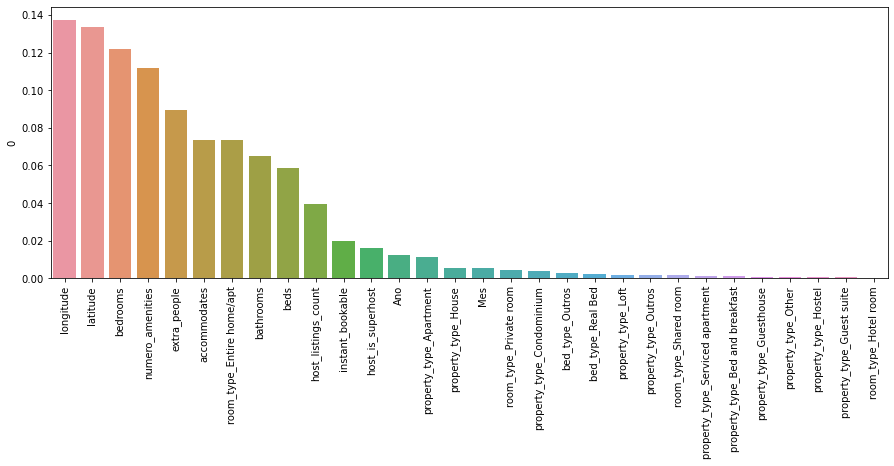

In [133]:
#print(modelo_et.feature_importances_)

def desenha_grafico_feature(modelo, x_train):   
    importancia_features = pd.DataFrame(modelo.feature_importances_, x_train.columns )
    importancia_features = importancia_features.sort_values(by=0, ascending=False)
    
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=importancia_features.index, y=importancia_features[0])
    ax.tick_params(axis='x', rotation=90)
    return importancia_features


importancia_features = desenha_grafico_feature(modelo_et, x_train)
display(importancia_features)



### Análise do gráfico

Ao organizar os dados da importância de cada feature para nosso modelo, notamos que alguns atributos não tem relavância em nosso algoritmo ou tem um baixíssimo impacto.

O atributo 'is_business_travel_ready' tem impacto 0 no nosso modelo e será excluído da análise.

Outra proposta seria remover todos os atributos que tenham menos de 1% de relevância no modelo, para torná-lo um modelo mais rápido sem detrimento expressivo de sua precisão.



### Ajustes finais do modelo

In [134]:
# Metodo de treino e teste do modelo selecionado
def testar_modelo(nome_modelo, modelo, base, r ): 
    y = base['price']
    x = base.drop('price', axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r)
    
    inicio = timeit.default_timer()

    #treinar
    modelo.fit(x_train, y_train)
    
    #testar
    previsao = modelo.predict(x_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))
    fim = timeit.default_timer()
    print ('duracao: %f' % (fim - inicio))
    print(f'num_features: {base_otimizada.shape[1]}')
    
    return (x_train, x, y)

In [135]:
#Remoção dos atributos com relevância menor que 1%
base_otimizada = base_airbnb_cod.drop(importancia_features.loc[importancia_features[0]<0.01].index, axis=1)

#Treinar o melhor modelo na pase reduzida e otimizada.
novo_x_train, novo_x, novo_y = testar_modelo('ExtraTrees', modelo_et, base_otimizada, 10)

Modelo: ExtraTrees
R²: 97.53%
RSME: 43.52
duracao: 122.535689
num_features: 15


**Comparação de resultados entre algoritmos**

1. ExtraTreesRegressor - Base Original<br>
    - R²: 97.51%
    - RSME: 41.85
    - duracao: 269.343048
    - num_features: 36<br>
    <br>
2. ExtraTreesRegressor  -Base Otimizada<br>
    - R²: 97.41%
    - RSME: 42.69
    - duracao: 191.168789
    - num_features: 18

<br>

**Considerações**

Visto que ao remover features com menos de 1% de relevância, resultou em uma avaliação bem próxima ao modelo original, porém com uma grande diferença no tamanho da base (36 original para 18 na base otimizada) configurando uma redução de 50% de atributos avaliados e de mais de 30% no tempo de execução, **considera-se o modelo otimizado como melhor opção**

0
longitude                  0.144667
latitude                   0.141025
bedrooms                   0.131103
numero_amenities           0.116964
extra_people               0.091658
accommodates               0.070850
bathrooms                  0.070217
room_type_Entire home/apt  0.068488
beds                       0.059933
host_listings_count        0.041013
instant_bookable           0.019594
property_type_Apartment    0.016060
host_is_superhost          0.015531
Ano                        0.012896

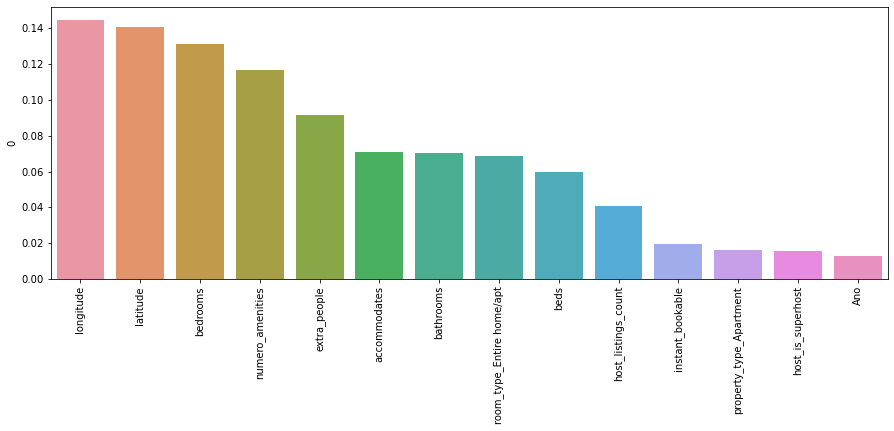

In [136]:
importancia_features = desenha_grafico_feature(modelo_et, novo_x_train)
display(importancia_features)

### ATENÇÃO!!!

Ainda que o algoritmo tenha se mostrado mais rápido e com o mesmo nível de eviciência, precisamos nos atentar ao fato de que não podemos eliminar somente parte de atributos "dummie" ou seja, itens como property_type, room_type, etc, não devem ser "partcialmente" eliminados. A recomendação neste caso, seria agrupar os outros itens que não tiveram relevância sob a algunha de "OUTROS" ou estratégia semelhante. Também é possível remover todo o elemento, ficando a critério da análise julgar se é viável ou não.


### Otimização v2

Vamos testar eliminando as colunas que ficaram "fracionadas" após nossa ultima alteração.
Também será aproveitado para remover o elemento 'host_is_superhost'. Ainda que a remoção de  vários atributos de uma vez não seja o recomendado. Neste caso já foram realizados estudos anteriores que sugerem que essa remoção não causará problemas ao nosso modelo


Modelo: ExtraTrees
R²: 97.45%
RSME: 44.25
duracao: 105.664899
num_features: 12


0
latitude             0.160091
longitude            0.158905
bedrooms             0.147282
numero_amenities     0.128243
accommodates         0.100524
extra_people         0.099381
beds                 0.069037
bathrooms            0.065693
host_listings_count  0.041140
instant_bookable     0.015779
Ano                  0.013925

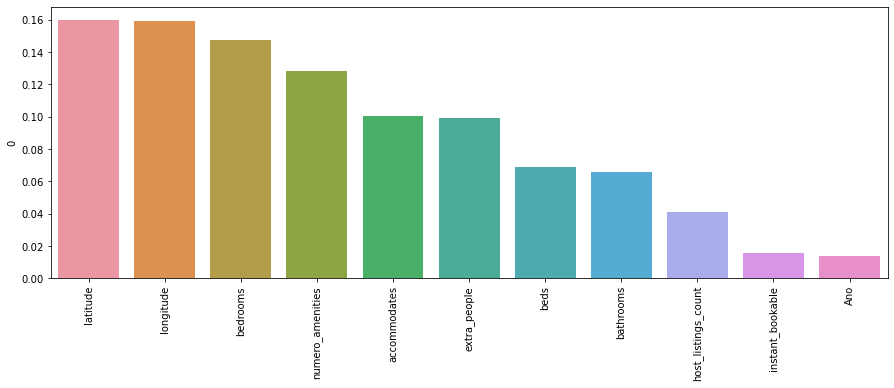

In [138]:
base_otimizada = base_otimizada.drop(['room_type_Entire home/apt','property_type_Apartment'], axis=1)
base_otimizada = base_otimizada.drop('host_is_superhost', axis=1)

novo_x_train, novo_x, novo_y = testar_modelo('ExtraTrees', modelo_et, base_otimizada, 10)
display(desenha_grafico_feature(modelo_et, novo_x_train))

#### Consideração da Otimização v2

Ao testar nosso modelo, obtivemos os seguintes resultados:<br>

Modelo: ExtraTrees<br>
R²: 97.27%<br>
RSME: 43.79<br>
duracao: 139.266511<br>
num_features: 12<br>
<br>
Como pode-se observar, com 12 features conseguimos manter o R² e diminuir o RSME, sendo um modelo mais simples e com melhor previsão do que as versões anteriores. 



# Deploy do projeto

**Passo a Passo do deploy**

1. Criar arquivo do modelo joblib
2. Escolher a forma de deploy:
    - Apresentação por meio do Streamlit
    - Repositório do Github
    - Servidor: Heroku
3. Importar Streamlit e criar códigos
4. Atribuir ao botão o carregamento do modelo
6. Testar resultados
7. Enviar ao repositório/servidor


In [140]:
import joblib

# Salva o modelo treinado em um arquivo para utilização futura.
#Com isso, dispensamos a necessidade de realizar o treinamento novamente.
joblib.dump(modelo_et, 'deploy/modelo.joblib')

['deploy/modelo.joblib']

# Fim do projeto de Ciência de Dados

Neste ponto, concluímos a entrega do arquivo com o modelo treinado e capaz de realizar boas previsões. 

Inicia-se no arquivo "deploy-projeto" o processo de Engenhaia de Dados relacionado ao Deploy e entrega funcional do nosso projeto.

In [141]:
# Nossa lista de features final
novo_x.columns

Index(['host_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'extra_people', 'instant_bookable',
       'Ano', 'numero_amenities'],
      dtype='object')